# Spam Collection Data Analysis

The Spam Collection Dataset is a public set of SMS labeled messages that have been collected for mobile phone spam research. The file we are using contains a collection of more than 5 thousand SMS phone messages.

In this analysis we will investigate a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand.

A collection of texts is also sometimes called _"corpus"_. We will need to have nltk installed in order to be able to download the corpus for stopwords. We will use those stopwords in our analysis.

__Import nltk.__

In [1]:
import nltk

__Download the corpus for stopwords by using__ `nltk.download_shell()` __command.__

In [2]:
# nltk.download_shell()

__Use__ `rstrip()` __and list comprehension to get a list of all the lines of text messages:__

In [3]:
messages = [line.rstrip() for line in open("mk025-project_spam_collection_data_analysis/SMSSpamCollection")]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

__Print the first ten messages and number them using__ `enumerate` __:__

In [6]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Due to the spacing we can tell that this is a "tab separated values(tsv)" file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. The numbers aren't part of the file, they are just from the `enumerate` call.

Using these labeled ham and spam examples, we'll __train a machine learning model to learn to discriminate between ham/spam automatically__. Then, with a trained model, we'll be able to __classify arbitrary unlabeled messages__ as ham or spam.

__Import pandas.__

In [7]:
import pandas as pd

We'll use `read_csv` and make note of the `sep` (seperator) argument, we can also specify the desired column names by passing in a list of `names`.

In [8]:
messages = pd.read_csv("mk025-project_spam_collection_data_analysis/SMSSpamCollection", 
                       sep="\t", 
                       names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


__Use__ `groupby` __to seperate the features ham and spam.__

In [10]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

__Make a new column to detect how long the text messages are.__

In [11]:
messages["length"] = messages["message"].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="bright")

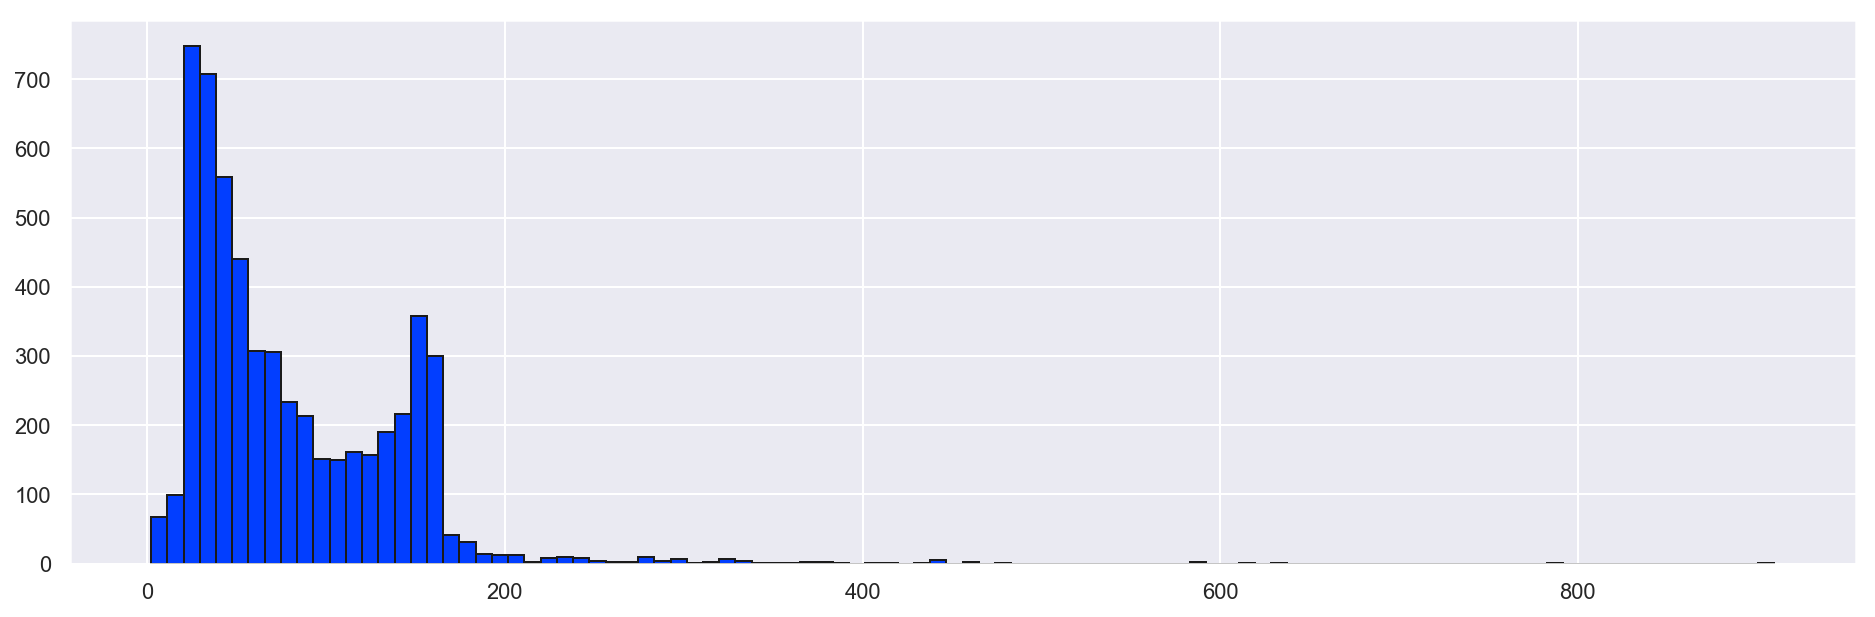

In [13]:
plt.figure(figsize=(16, 5))
messages["length"].hist(bins=100, 
                        edgecolor="k")

x-axis goes all the way to about 900, this must mean that there is some really long message.

In [14]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages["length"] == 910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

__Plot a histogram of the length of the messages for each label.__

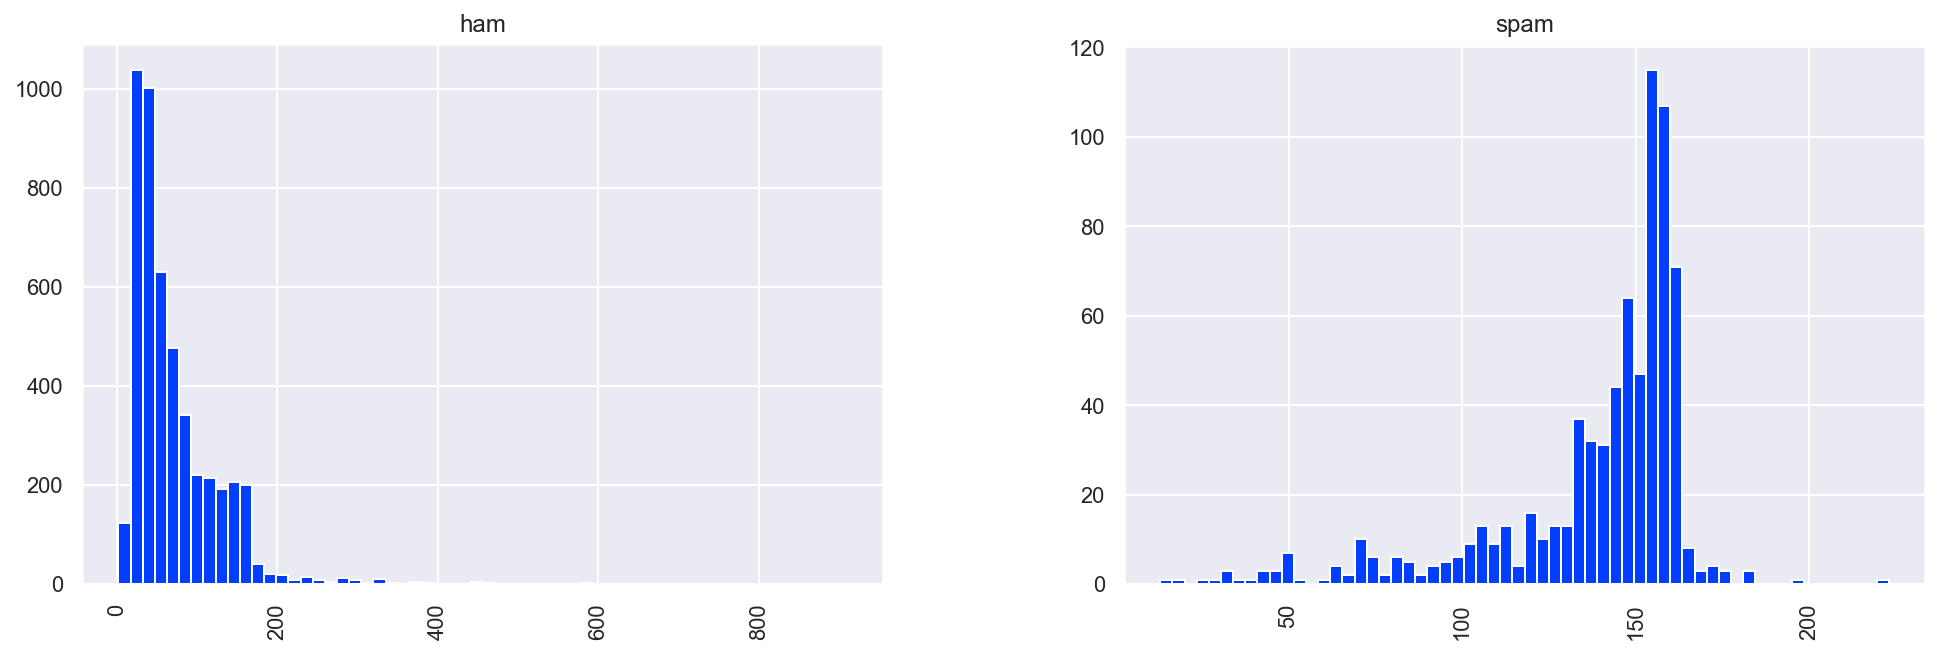

In [18]:
messages.hist(column="length", 
              by="label", 
              bins=60, 
              edgecolor="w", 
              figsize=(16, 5))
fig.tight_layout()

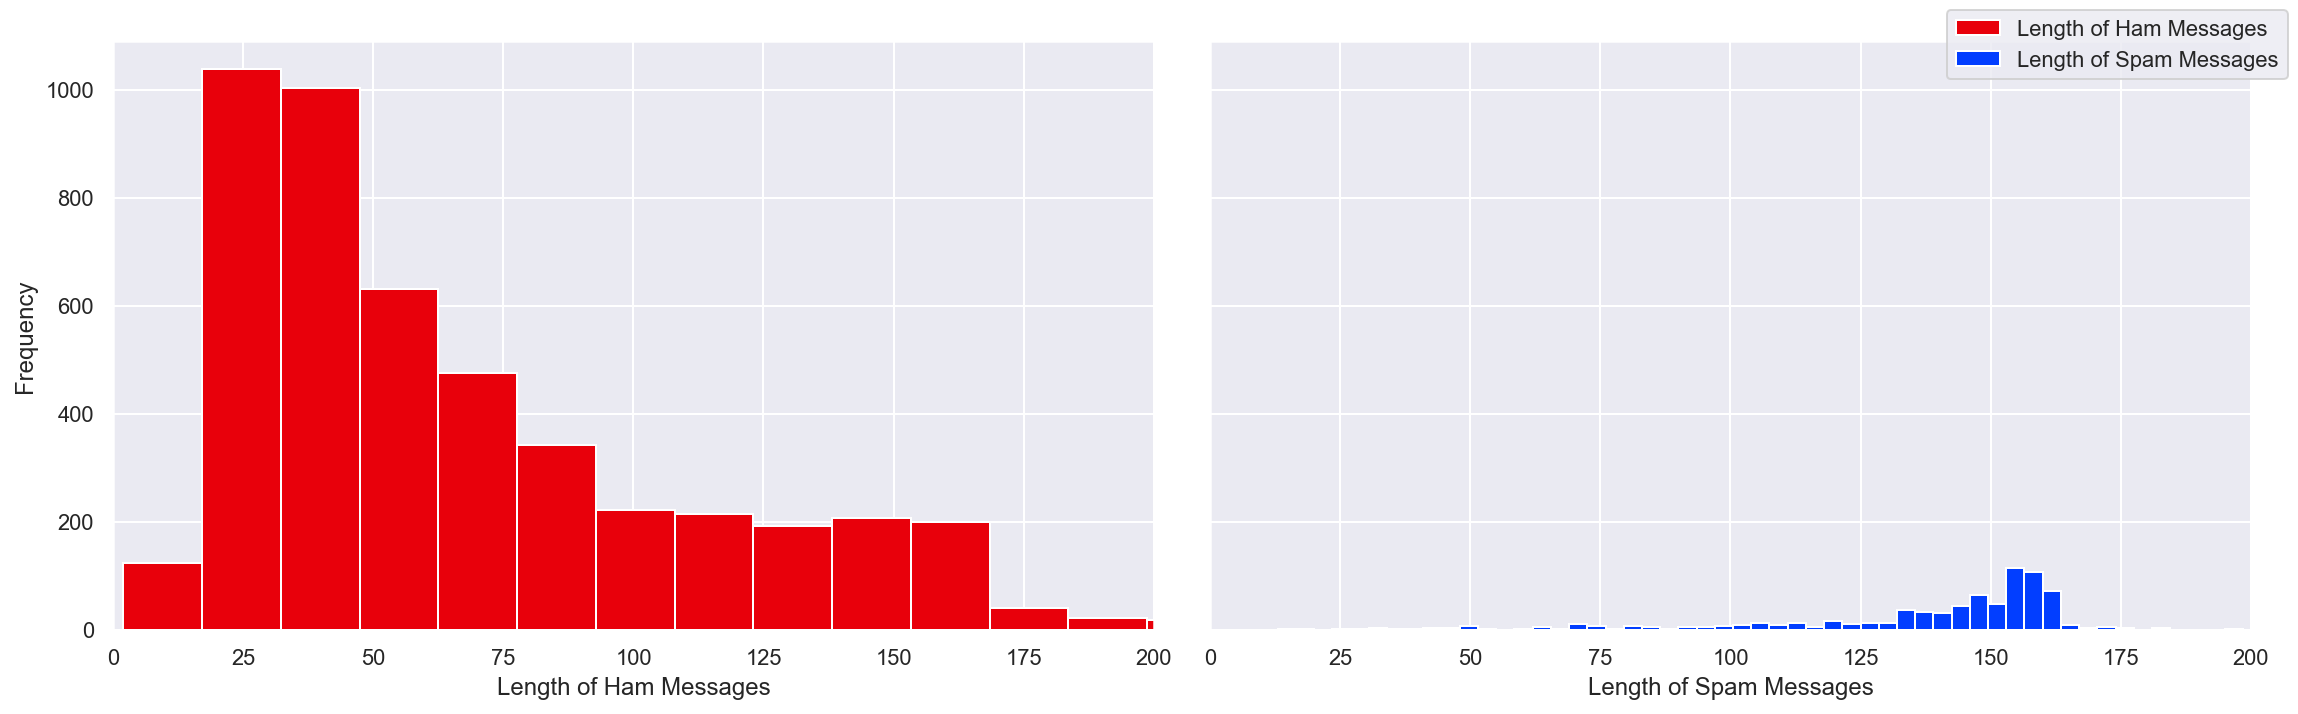

In [19]:
fig, ax = plt.subplots(1, 
                       2, 
                       sharey=True, 
                       edgecolor="w", 
                       figsize=(16, 5))
ax[0].hist(messages["length"][messages["label"] == "ham"], 
           bins=60, 
           label="Length of Ham Messages", 
           color="r")
ax[0].set_xlim([0, 200])
ax[0].set_xlabel("Length of Ham Messages")
ax[0].set_ylabel("Frequency")
ax[1].hist(messages["length"][messages["label"] == "spam"], 
           bins=60, 
           label="Length of Spam Messages")
ax[1].set_xlim([0, 200])
ax[1].set_xlabel("Length of Spam Messages")
fig.legend()
fig.tight_layout()

The plots show a trend that spam messages tend to have more characters.

## Text Pre-Processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use `apply()` in pandas do process all the text in the DataFrame.

First we remove punctuation. We can just take advantage of Python's built-in `string` library to get a quick list of all the possible punctuation:

In [20]:
import string

In [21]:
mess = "Sample message! Notice: it has punctuation...&%+"

In [22]:
word_list = "".join([c for c in mess if c not in string.punctuation]).split()

In [23]:
word_list

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

__Import a list of english stopwords from NLTK.__

In [24]:
from nltk.corpus import stopwords

__Remove stopwords from__ `word_list` __.__

In [25]:
clean_mess = [word for word in word_list if word.lower() not in stopwords.words("english")]

In [26]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

__Put both of these together in a function to apply it to the DataFrame.__

In [27]:
def text_process(mess):
    """
    1. Removes punctuation.
    2. Joins all the characters.
    3. Splits words.
    4. Removes stopwords from words.
    5. Returns remaining words.
    """
    mess_word_list = "".join([c for c in mess if c not in string.punctuation]).split()
    return [word for word in mess_word_list if word.lower() not in stopwords.words("english")]

In [28]:
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

__Apply__ `text_process` __function to the__ `"message"` __column of the Dataframe.__

In [29]:
messages["processed"] = messages["message"].apply(text_process)

In [30]:
messages.head()

,label,message,length,processed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


## Vectorization

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand. We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's `CountVectorizer`. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [31]:
# Count how many times does a word occur in each message 
# (Known as term frequency) with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

We will specify the `analyzer` to be our own previously defined function.

In [32]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["message"])

In [33]:
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [34]:
print(messages["message"][3])

U dun say so early hor... U c already then say...


In [35]:
print(bow_transformer.transform([messages["message"][3]]))

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [36]:
bow_transformer.get_feature_names()[9554]

'say'

In [37]:
bow_transformer.get_feature_names()[4068]

'U'

__Use__ `bow_transformer.transform` __to transform the entire DataFrame of messages into the Sparse Matrix.__

In [38]:
messages_bow = bow_transformer.transform(messages["message"])

In [39]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


__Find sparsity by calculating the ratio of nonzero and total occurances.__

In [40]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


## Term Frequency-Inverse Document Frequency (TF-IDF)

TF-IDF weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the TF-IDF weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the TF-IDF for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the TF-IDF weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., TF) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., IDF) is calculated as log(10,000,000 / 1,000) = 4. Thus, the TF-IDF weight is the product of these quantities: 0.03 * 4 = 0.12.
____

TF-IDF can be done with scikit-learn's `TfidfTransformer`.

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [43]:
tfidf4 = tfidf_transformer.transform(bow_transformer.transform([messages["message"][3]]))

In [44]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


__Check what is the IDF (inverse document frequency) of the word__ `"u"` __and of word__ `"university"` __?__

In [45]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


__Transform the entire bag-of-words corpus into TF-IDF corpus.__

In [46]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Training a Model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. Naive Bayes classifier algorithm is a good choice.

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, 
                                        messages["label"])

In [49]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [50]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
msg_train, msg_test, label_train, label_test = train_test_split(messages["message"], 
                                                                messages["label"], 
                                                                test_size=0.3)
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's `Pipeline` capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)), # strings to token integer counts
    ("tfidf", TfidfTransformer()),                   # integer counts to weighted TF-IDF scores
    ("classifier", MultinomialNB())])                # train on TF-IDF vectors w/ Naive Bayes classifier

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [55]:
pipeline.fit(msg_train, 
             label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001A33EFE4EA0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [56]:
predictions = pipeline.predict(msg_test)

## Model Evaluation

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
print(classification_report(label_test, predictions))
print(confusion_matrix(label_test, predictions))
print(accuracy_score(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1441
        spam       1.00      0.71      0.83       231

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

[[1441    0]
 [  67  164]]
0.9599282296650717
